In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import os
import sys
from scipy.stats import t

In [2]:
def stat_error(data, conf_prob=0.99):
    #conf_prob - Доверительная вероятность  
    n = len(data)
    student_coef = round(t.ppf((1 + conf_prob )/2, n - 1), 2)
    var = np.var(data)
    interval = student_coef * np.sqrt((var)/n)
    return interval

# Задание 1 
### Определение мёртвого времени детектора одиночных фотонов
«Мертвое» время ДОФ можно определить, если подать на него какое-то
количество лазерных импульсов подряд. Это позволит выделить временной
интервал, в который не происходит регистрации фотонов.


In [3]:
# Количество импульсов(шт)
N_p = 500
#Время между пиками на гистограмме (шт в импульсах )
time = np.array([177, 198, 191, 200, 190, 200])
#Ширины пиков на полувысоте (шт  в импульсах)
t_hf = np.array([32, 35, 37, 43, 49, 43, 50])
# цена деления 
dp = 20
# Частота тактов(Гц)
nu_0 = 5e+6


R - среднее расстояние между пиками в импульсах $\newline$
Dp_R - Случайная погрешность расстояния между пиками $\newline$
Dr_R - погрешность отсчёта в импульсах $\newline$
D_R - итоговая абсолютная погрешность в импульсах $\newline$
$\Delta R = \sqrt{Dp_R^2 + Dr_R^2}$

In [4]:
R =  np.mean(time)
#Случайная ошибка 
Dp_R =  stat_error(time, conf_prob=0.66)
#Погрешность отчёта (1/6 цены деления для доверительрой вероятности 0.66)
Dr_R = 1/6 * dp
# не совсем корректно прикручивать сюда ещё ширину пиков, поэтому делать этого я не буду 
# Итоговая абсолютная погрешность 
D_R = np.sqrt(Dr_R**2 + Dp_R**2)

Мёртвое время считается по формуле $\newline DT = \frac{R}{\nu_0}\newline$ 
а погрешность по формуле $\Delta DT =  \frac{\Delta R}{\nu_0}$

In [5]:
DT = R / nu_0
D_DT = D_R / nu_0

In [6]:
print('Мёртвое время в мкс = ', DT*1e+6)
print('Абсолютная погрешность мёртвого времени в мкс = ', D_DT*1e+6) 

Мёртвое время в мкс =  38.53333333333333
Абсолютная погрешность мёртвого времени в мкс =  0.961159600575148


# Задание 2 
### Определение частоты темновых отсчётов детектора одиночных фотонов
Определение частоты темновых отсчётов осуществляется путём
регистрации срабатываний ДОФ в моменты времени, когда лазерные импульсы на
него не подаются

In [7]:
# Количество импульсов(шт)
N_p = 0
#Период трейна (в тактах)
T_tr = 4000
# Частота тактов(Гц)
nu_0 = 5e+6
#Период тактов (c)
T_0 = 200e-9
#Количество трейнов 
N_t = 3000

Время регистрации вычисляется по формуле 
$T_{reg} = \frac{T_{tr}}{\nu_0}\cdot N_t \newline$
$N_c - количество\quad зарегистрированных\quad фотонов\newline$
Было проведено  несколько измерений N_c с вышеуказанными параметрами 

In [8]:
N_c = np.array([805, 850, 821, 826,820, 755])
D_N_c = stat_error(N_c, conf_prob=0.66)
N_c = np.mean(N_c)

In [9]:
T_reg = T_tr*N_t/nu_0

Частота темновых отчётов ДОФ в отсутствие импульсов расчитывается по формуле $ DCP = \frac{N_c}{T_{reg}}\newline
Погрешность\quad \Delta DCP = \frac{\Delta N_c}{T_{reg}} $

In [10]:
DCP = N_c / T_reg 
D_DCP = D_N_c/ T_reg

In [11]:
print('Частота темновых отчётов ДОФ = ',DCP)
print('Абсолютная погрешность = ', D_DCP)

Частота темновых отчётов ДОФ =  338.6805555555556
Абсолютная погрешность =  5.196474346206959


# Задание 3
### Определение квантовой эффективности детектора одиночных фотонов
Для определения квантовой эффективности ДОФ необходимо измерить
количество фотонов, приходящих на него, и количество зарегистрированных.
Количество фотонов рассчитывается исходя из параметров источника лазерного
излучения, количество же зарегистрированных определяется с помощью
программы обработки данных ДОФ.

In [12]:
#Мощность лазерного источника в  Вт
P = 2*1e-6

# длина волны излучения м
lambd = 1550 *1e-9

# скорость света в м\с
c = 3 * 1e+8

# Частота тактов(Гц)
nu_0 = 5e+6

# постоянная планка 
h = 6.626 * 1e-34

#затухание в dB
alpha = np.array([6,7,8,9,10,11,12,13,14,15])

# количество зарегистрированных фотонов
C = np.array([19903, 19691, 17853, 16627, 15322, 14081, 13064, 12127, 10947, 10025])
              
# количество импульсов в трейне 
N_pls = 1
              
# количество трейнов 
N_t = 20000
              
#размер трейна в тактах 
T_t = 400
              
# затухание в катушке dB 
alpha_c = 26.012*0.184
# итоговое затухание 
alpha = alpha + alpha_c 
# Мы не посмотрели, какое количество фотонов придёт на ДOФ ,без дополнительной аттенюации, поэтому будем считать
N_ph = P * lambd / (nu_0 * h * c)

In [13]:
#Количество импульсов, направляемых на ДОФ
M = N_pls*N_t

In [14]:
#Количество пришедших на ДОФ фотонов с учётом дополнительной аттенюации 
N = M * N_ph *10**(-0.1*alpha)

In [15]:
#Квантовая эффективность 
QE = C / N 

In [16]:
QE_m = np.mean(QE)
D_QE_m = stat_error(QE, conf_prob=0.66)


In [17]:
print("Квантовая эффективность = ", QE )
print("Абсолютная погрешность квантовой эффективности = ", D_QE_m)

Квантовая эффективность =  [3.82375752e-06 4.76255028e-06 5.43604454e-06 6.37361312e-06
 7.39413302e-06 8.55471015e-06 9.99189756e-06 1.16768359e-05
 1.32698777e-05 1.52987583e-05]
Абсолютная погрешность квантовой эффективности =  1.1604615040491053e-06


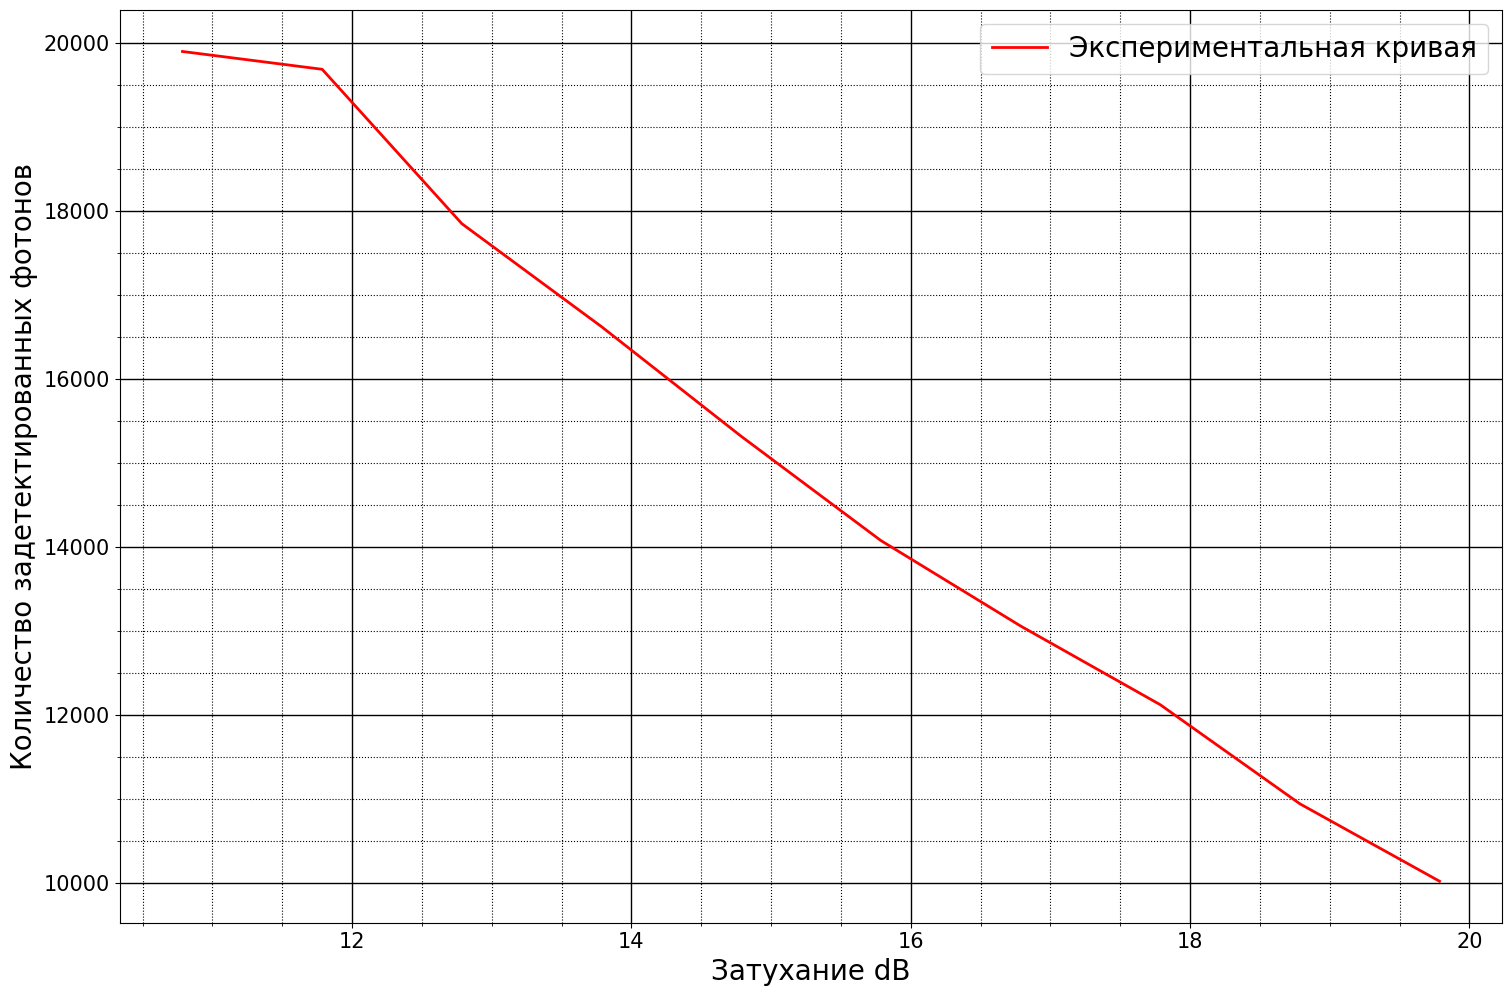

In [18]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1,1,1)
# подстройку толщин линий лучше выполнять самостоятельно
width = 2
ax.plot(alpha, C, c='r',linewidth=width, label="Экспериментальная кривая") 
ax.set_xlabel('Затухание dB',fontweight='light',color='k', fontsize=20)
ax.set_ylabel("Количество задетектированных фотонов",fontweight='light',color='k', fontsize=20)
plt.tight_layout()
plt.tick_params(axis='both', which='major', labelsize=15)
ax.minorticks_on()
ax.legend(fontsize=20, loc='upper right')
#  Определяем внешний вид линий основной сетки:
ax.grid(which='major',
        color = 'k', 
        linewidth = 1)

#  Определяем внешний вид линий вспомогательной
#  сетки:
ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':' )
fig.savefig(os.path.join(sys.path[0]+'/plot', 'num_of_ph.png'))